# batch normalization이 미치는 영향

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import copy

#np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [45]:
torch.manual_seed(1)

mnist_train = datasets.MNIST(root='MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, download=True, transform=transforms.ToTensor())

train_set, val_set = torch.utils.data.random_split(mnist_train,[50000,10000])

train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_set, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=32, shuffle=True, drop_last=True)

In [46]:
linear1 = nn.Linear(784,32,bias=True)
linear2 = nn.Linear(32,32,bias=True)
linear3 = nn.Linear(32,10,bias=True)

bn_linear1 = copy.deepcopy(linear1)
bn_linear2 = copy.deepcopy(linear2)
bn_linear3 = copy.deepcopy(linear3)

class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = linear1
        self.fc2 = linear2
        self.fc3 = linear3
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = bn_linear1
        self.fc2 = bn_linear2 
        self.fc3 = bn_linear3
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        print(out)
        out = self.batch1(out)
        print(out)
        out = self.relu(out)
        print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [47]:
base_model = basic_model()
bn_model = batchnorm_model()


for X,Y in train_loader:
    X = X.view(-1, 28*28)
    Y = Y

    print('기본 모델 output값 \n')
    base_predict = base_model(X)
    print('\n batch normalization 모델 output값 \n')
    bn_predict = bn_model(X)
    
    break

기본 모델 output값 

tensor([[ 0.0682,  0.3799, -0.1332,  ...,  0.1464,  0.1553, -0.1159],
        [ 0.1212,  0.3183, -0.2920,  ...,  0.1927, -0.0032,  0.1812],
        [ 0.2551,  0.1136, -0.0390,  ...,  0.1895,  0.1812, -0.0349],
        ...,
        [-0.1384,  0.1593, -0.0021,  ...,  0.2032,  0.0374,  0.1118],
        [-0.2559, -0.0228,  0.1251,  ..., -0.0708, -0.0883, -0.0699],
        [-0.0120,  0.1813, -0.4436,  ...,  0.2946,  0.0849,  0.1626]],
       grad_fn=<AddmmBackward>)
tensor([[0.0682, 0.3799, 0.0000,  ..., 0.1464, 0.1553, 0.0000],
        [0.1212, 0.3183, 0.0000,  ..., 0.1927, 0.0000, 0.1812],
        [0.2551, 0.1136, 0.0000,  ..., 0.1895, 0.1812, 0.0000],
        ...,
        [0.0000, 0.1593, 0.0000,  ..., 0.2032, 0.0374, 0.1118],
        [0.0000, 0.0000, 0.1251,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.1813, 0.0000,  ..., 0.2946, 0.0849, 0.1626]],
       grad_fn=<ReluBackward0>)

 batch normalization 모델 output값 

tensor([[ 0.0682,  0.3799, -0.1332,  ...,  0.1464,  0

In [48]:
print(base_model.fc1.weight.shape)
print(base_model.fc2.weight.shape)
print(base_model.fc3.weight.shape)

torch.Size([32, 784])
torch.Size([32, 32])
torch.Size([10, 32])


In [49]:
print('기본 모델 parameters \n')
for names in base_model.state_dict():
    print(names)
    print(base_model.state_dict()[names])

print('\nbatch normalization 모델 parameters \n')
for name in bn_model.state_dict():
    print(name)
    print(bn_model.state_dict()[name])

기본 모델 parameters 

fc1.weight
tensor([[ 2.8576e-02,  3.5083e-02, -8.0574e-03,  ..., -1.8364e-02,
          1.7391e-02, -3.1038e-02],
        [ 2.9337e-02,  1.8904e-02, -1.8641e-02,  ..., -2.0072e-02,
         -2.7632e-02, -2.2221e-03],
        [-3.5552e-02, -1.2692e-02, -1.6269e-02,  ..., -4.7715e-03,
         -3.1350e-02,  1.3301e-02],
        ...,
        [ 2.4914e-02,  1.6569e-02, -2.1227e-02,  ..., -2.3371e-02,
          3.4784e-02,  1.3903e-02],
        [-6.9801e-05, -2.1214e-02, -3.1542e-02,  ..., -2.1621e-02,
          3.3712e-02,  1.4554e-02],
        [-3.3216e-02,  1.8773e-02,  1.1545e-02,  ...,  2.0882e-03,
          2.3355e-02,  2.9850e-02]])
fc1.bias
tensor([ 0.0104,  0.0042,  0.0269, -0.0289, -0.0119, -0.0318, -0.0146, -0.0357,
         0.0048,  0.0014,  0.0157,  0.0146, -0.0120, -0.0211,  0.0126,  0.0159,
         0.0184, -0.0116, -0.0113,  0.0098, -0.0256, -0.0177, -0.0330, -0.0116,
        -0.0302,  0.0315, -0.0010, -0.0141, -0.0329,  0.0012,  0.0192,  0.0059])
fc2.weig

# Train loss vs Test loss 비교하기

In [50]:
class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = nn.Linear(784,32,bias=True)
        self.fc2 = nn.Linear(32,32,bias=True)
        self.fc3 = nn.Linear(32,10,bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = nn.Linear(784,32,bias=True)
        self.fc2 = nn.Linear(32,32,bias=True)
        self.fc3 = nn.Linear(32,10,bias=True)
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.batch1(out)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [51]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

# Train

base_train_iteration_loss = []
base_train_epoch_loss = []
base_valid_iteration_loss = []
base_valid_epoch_loss = []

for epoch in range(10):
    base_model.train()
    train_avg_cost = 0
    valid_avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

        base_train_iteration_loss.append(base_loss.item())
        train_avg_cost += base_loss / len(train_loader)
    
    base_train_epoch_loss.append(train_avg_cost.item())

    print('epoch: ', epoch, 'cost: ', train_avg_cost.item())

    base_model.eval()
    with torch.no_grad():
        for X,Y in val_loader:
            X = X.view(-1, 28*28)
            Y = Y

            valid_predict = base_model(X)
            valid_loss = base_criterion(valid_predict, Y)
            base_valid_iteration_loss.append(valid_loss.item())
            valid_avg_cost += valid_loss / len(val_loader)
        
        base_valid_epoch_loss.append(valid_avg_cost.item())

# Test 

base_test_iteration_loss = []
accuracy = []

base_model.eval()
with torch.no_grad():
    for X,Y in test_loader:
        X = X.view(-1, 28*28)
        Y = Y

        test_predict = base_model(X)
        test_loss = base_criterion(test_predict, Y)
        base_test_iteration_loss.append(test_loss.item())
        correct_predict = torch.argmax(test_predict, 1) == Y
        batch_accuracy = correct_predict.float().mean()
        accuracy.append(batch_accuracy.item())
    
    total_accuracy = sum(accuracy) / len(test_loader)
    print("Test accuracy: ", total_accuracy)
    

epoch:  0 cost:  0.4248911142349243
epoch:  1 cost:  0.2051786482334137
epoch:  2 cost:  0.15944230556488037
epoch:  3 cost:  0.13290444016456604
epoch:  4 cost:  0.1141820177435875
epoch:  5 cost:  0.10007618367671967
epoch:  6 cost:  0.08948474377393723
epoch:  7 cost:  0.08139494061470032
epoch:  8 cost:  0.07298200577497482
epoch:  9 cost:  0.06734597682952881
Test accuracy:  0.9650440705128205


<function matplotlib.pyplot.show(close=None, block=None)>

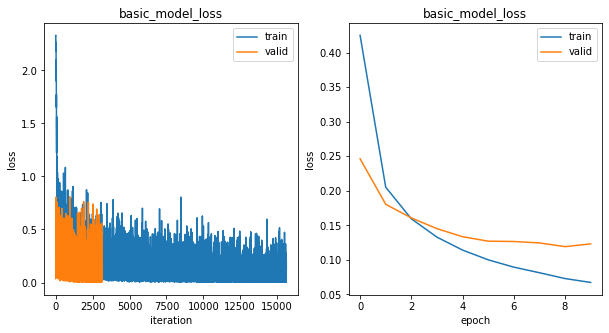

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('basic_model_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), base_train_iteration_loss, range(len(val_loader)*10), base_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('basic_model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), base_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

In [53]:
bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

# Train

bn_train_iteration_loss = []
bn_train_epoch_loss = []
bn_valid_iteration_loss = []
bn_valid_epoch_loss = []

for epoch in range(10):
    bn_model.train()
    train_avg_cost = 0
    valid_avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_predict = bn_model(X)
        bn_loss = bn_criterion(bn_predict, Y)
        bn_loss.backward()
        bn_optimizer.step()

        bn_train_iteration_loss.append(bn_loss.item())
        train_avg_cost += bn_loss / len(train_loader)
    
    bn_train_epoch_loss.append(train_avg_cost.item())

    print('epoch: ', epoch, 'cost: ', train_avg_cost.item())

    bn_model.eval()
    with torch.no_grad():
        for X,Y in val_loader:
            X = X.view(-1, 28*28)
            Y = Y

            valid_predict = bn_model(X)
            valid_loss = bn_criterion(valid_predict, Y)
            bn_valid_iteration_loss.append(valid_loss.item())
            valid_avg_cost += valid_loss / len(val_loader)
        
        bn_valid_epoch_loss.append(valid_avg_cost.item())

bn_test_iteration_loss = []
bn_accuracy = []

# Test

bn_model.eval()
with torch.no_grad():
    for X,Y in test_loader:
        X = X.view(-1, 28*28)
        Y = Y

        test_predict = bn_model(X)
        test_loss = bn_criterion(test_predict, Y)
        bn_test_iteration_loss.append(test_loss.item())
        correct_predict = torch.argmax(test_predict, 1) == Y
        batch_accuracy = correct_predict.float().mean()
        bn_accuracy.append(batch_accuracy.item())
    
    total_accuracy = sum(bn_accuracy) / len(test_loader)
    print("accuracy: ", total_accuracy)

epoch:  0 cost:  0.39805760979652405
epoch:  1 cost:  0.18765586614608765
epoch:  2 cost:  0.14893141388893127
epoch:  3 cost:  0.1323012113571167
epoch:  4 cost:  0.1204293817281723
epoch:  5 cost:  0.11030353605747223
epoch:  6 cost:  0.10210216790437698
epoch:  7 cost:  0.09341803938150406
epoch:  8 cost:  0.09020207077264786
epoch:  9 cost:  0.08533374965190887
accuracy:  0.9708533653846154


<function matplotlib.pyplot.show(close=None, block=None)>

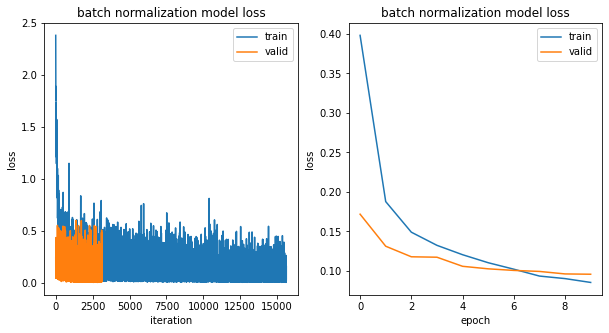

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('batch normalization model loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(train_loader)*10), bn_train_iteration_loss, range(len(val_loader)*10), bn_valid_iteration_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.subplot(1,2,2)
plt.title('batch normalization model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), bn_train_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['train', 'valid'], loc = 1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

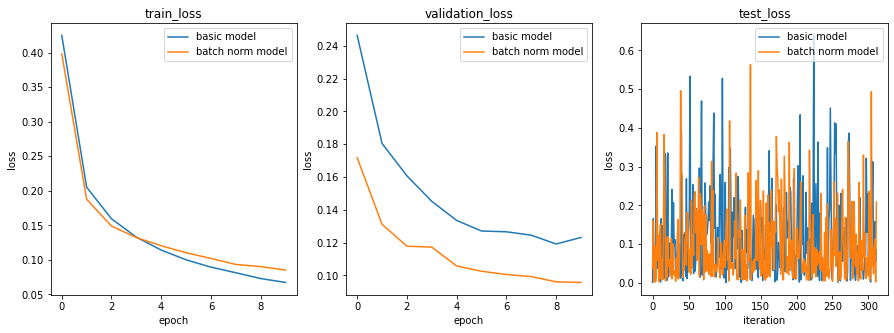

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_train_epoch_loss, range(10), bn_train_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,2)
plt.title('validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(10), base_valid_epoch_loss, range(10), bn_valid_epoch_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.subplot(1,3,3)
plt.title('test_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(test_loader)), base_test_iteration_loss, range(len(test_loader)), bn_test_iteration_loss)
plt.legend(['basic model', 'batch norm model'], loc = 1)
plt.show

# 초기 Weight가 0일 때 backpropagation은 어떻게 이루어질까?

In [56]:
class zero_weight_model(nn.Module):
    def __init__(self):
        super(zero_weight_model,self).__init__()
        self.fc1 = nn.Linear(784, 10, bias=True)
        self.fc2 = nn.Linear(10, 10, bias=True)
        self.relu = nn.ReLU()

        torch.nn.init.constant_(self.fc1.weight, 0)
        torch.nn.init.constant_(self.fc1.bias, 0)
        torch.nn.init.constant_(self.fc2.weight, 0)
        torch.nn.init.constant_(self.fc2.bias, 0)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out

class linear_model(nn.Module):
    def __init__(self):
        super(linear_model, self).__init__()
        self.fc1 = nn.Linear(784, 10, bias=True)
        self.fc2 = nn.Linear(10, 10, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out

In [57]:
zero_model = zero_weight_model()
print('weight of zero_model\n')
for params in zero_model.state_dict():
    print(zero_model.state_dict()[params])
    print(torch.sum(zero_model.state_dict()[params]))

standard_model = linear_model()
print('\nweight of standard_model\n')
for params in standard_model.state_dict():
    print(standard_model.state_dict()[params])

weight of zero_model

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor(0.)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor(0.)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor(0.)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor(0.)

weight of standard_model

tensor([[ 0.0265, -0.0057, -0.0149,  ...,  0.0335,  0.

In [58]:
loader = DataLoader(mnist_train, batch_size = 10, shuffle=True, drop_last=True)

zero_model = zero_weight_model()
zero_criterion = torch.nn.CrossEntropyLoss()
zero_optimizer = optim.Adam(zero_model.parameters(), lr=0.001)

standard_model = linear_model()
standard_criterion = torch.nn.CrossEntropyLoss()
standard_optimizer = optim.Adam(standard_model.parameters(), lr=0.001)

for idx, sample in enumerate(loader):
    
    print("Zero weight model의 현재 파라미터 \n")
    for param in zero_model.state_dict():
        print(zero_model.state_dict()[param], '\n')

    print("standard model의 현재 파라미터 \n")
    for param in standard_model.state_dict():
        print(standard_model.state_dict()[param], '\n')

    if idx == 2:
        break

    X, Y = sample
    X = X.view(-1, 28*28)
    
    zero_optimizer.zero_grad()    
    zero_predict = zero_model(X)
    zero_loss = zero_criterion(zero_predict, Y)
    zero_loss.backward()
    zero_optimizer.step()

    standard_optimizer.zero_grad()
    standard_predict = standard_model(X)
    standard_loss = standard_criterion(standard_predict, Y)
    standard_loss.backward()
    standard_optimizer.step()

    print('Zero weight model output : ', zero_predict, '\n')
    print('Standard model output : ', standard_predict, '\n')

#https://deep-learning-study.tistory.com/678

Zero weight model의 현재 파라미터 

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

standard model의 현재 파라미터 

tensor([[-0.0146,  0.0223, -0.0288,  ...,  0.0007, -0.0295, -0.0014],
        [ 0.02

In [59]:
loader = DataLoader(mnist_train, batch_size = 10, shuffle=True, drop_last=True)

zero_model = zero_weight_model()
zero_criterion = torch.nn.CrossEntropyLoss()
zero_optimizer = optim.Adam(zero_model.parameters(), lr=0.001)

standard_model = linear_model()
standard_criterion = torch.nn.CrossEntropyLoss()
standard_optimizer = optim.Adam(standard_model.parameters(), lr=0.001)
# optimizer랑 loss를 공유하면 안되나? 내일 해보기

for epoch in range(30):
    zero_model.train()
    standard_model.train()

    print("Zero weight model의 현재 파라미터 \n")
    for param in zero_model.state_dict():
        print(zero_model.state_dict()[param], '\n')

    print("standard model의 현재 파라미터 \n")
    for param in standard_model.state_dict():
        print(standard_model.state_dict()[param], '\n')

    # if epoch == 2:
    #     break

    for X,Y in loader:
     
        X = X.view(-1, 28*28)
        
        zero_optimizer.zero_grad()    
        zero_predict = zero_model(X)
        zero_loss = zero_criterion(zero_predict, Y)
        zero_loss.backward()
        zero_optimizer.step()

        standard_optimizer.zero_grad()
        standard_predict = standard_model(X)
        standard_loss = standard_criterion(standard_predict, Y)
        standard_loss.backward()
        standard_optimizer.step()

    print('Zero weight model output : ', zero_predict)
    print('Standard model output : ', standard_predict)
    print('Label : ', Y, '\n')

    #https://deep-learning-study.tistory.com/678

Zero weight model의 현재 파라미터 

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

standard model의 현재 파라미터 

tensor([[-2.7166e-02,  1.8388e-02,  8.3394e-03,  ..., -2.3458e-02,
         -3.2507e

In [60]:
for X,Y in loader:
    print(X)
    print(Y)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.